<a href="https://colab.research.google.com/github/Allaht2007/Desafio_dataScience_one/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [3]:
def soma_total_vendas(df_loja):
  return df_loja['Preço'].sum()

dict_lojas = {
    "Loja 1":soma_total_vendas(loja),
    "Loja 2":soma_total_vendas(loja2),
    "Loja 3":soma_total_vendas(loja3),
    "Loja 4":soma_total_vendas(loja4)
}




In [4]:
faturamento_lojas = pd.Series(dict_lojas, name='Faturamento')
faturamento_lojas

,Faturamento
Loja 1,1534509.12
Loja 2,1488459.06
Loja 3,1464025.03
Loja 4,1384497.58


# 2. Vendas por Categoria

In [5]:
def agrupa_categoria_preco(df_loja):

  return df_loja.groupby('Categoria do Produto')['Preço'].sum()

dict_lojas = {
    "Loja 1":agrupa_categoria_preco(loja),
    "Loja 2":agrupa_categoria_preco(loja2),
    "Loja 3":agrupa_categoria_preco(loja3),
    "Loja 4":agrupa_categoria_preco(loja4)
}


In [6]:
vendas_categorias_Loja = pd.DataFrame(dict_lojas)
vendas_categorias_Loja

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,23993.78,21262.21,25869.20,27015.67
eletrodomesticos,484913.36,464758.13,438984.89,377680.65
eletronicos,572659.23,547773.71,547699.92,545966.86
esporte e lazer,52387.55,46326.09,47456.10,44465.65
instrumentos musicais,121731.69,139987.03,103174.45,100136.50
livros,11713.92,13454.35,12664.70,12427.77
moveis,250178.11,235234.68,268095.56,256705.65
utilidades domesticas,16931.48,19662.86,20080.21,20098.83


# 3. Média de Avaliação das Lojas


In [7]:
dict_lojas2 = {
    "loja 1": loja["Avaliação da compra"].mean(),
    "loja 2": loja2["Avaliação da compra"].mean(),
    "loja 3": loja3["Avaliação da compra"].mean(),
    "loja 4": loja4["Avaliação da compra"].mean()
}

In [8]:
avaliacao_clientes = pd.DataFrame.from_dict(dict_lojas2, orient="index", columns=["Avaliação Média"])
avaliacao_clientes

,Avaliação Média
loja 1,3.976685
loja 2,4.037304
loja 3,4.048326
loja 4,3.995759


# 4. Produtos Mais e Menos Vendidos

In [9]:

def analisar_destaques_loja(df_loja):

    contagens = df_loja['Produto'].value_counts()

    resultado = {
        "Nome Menos Vendido": contagens.idxmin(),
        "Contagem Menos Vendido": contagens.min(),
        "Nome Mais Vendido": contagens.idxmax(),
        "Contagem Mais Vendido": contagens.max()
    }


    return resultado

dict_lojas = {
    "loja 1": analisar_destaques_loja(loja),
    "loja 2": analisar_destaques_loja(loja2),
    "loja 3": analisar_destaques_loja(loja3),
    "loja 4": analisar_destaques_loja(loja4)
}



In [10]:
df_destaques = pd.DataFrame.from_dict(dict_lojas, orient='index')
df_destaques

,Nome Menos Vendido,Contagem Menos Vendido,Nome Mais Vendido,Contagem Mais Vendido
loja 1,Headset,33,Micro-ondas,60
loja 2,Jogo de tabuleiro,32,Iniciando em programação,65
loja 3,Blocos de montar,35,Kit banquetas,57
loja 4,Guitarra,33,Cama box,62


# 5. Frete Médio por Loja

In [11]:
dict_lojas_frete = {
    "loja 1": loja["Frete"].mean(),
    "loja 2": loja2["Frete"].mean(),
    "loja 3": loja3["Frete"].mean(),
    "loja 4": loja4["Frete"].mean()
}

In [12]:
frete_medio = pd.DataFrame.from_dict(dict_lojas_frete, orient="index", columns=["Frete Médio"])
frete_medio

,Frete Médio
loja 1,34.691805
loja 2,33.621941
loja 3,33.074464
loja 4,31.278997


# 6. Visualização

<Axes: title={'center': 'Faturamento por Loja em % 1'}, ylabel='Faturamento'>

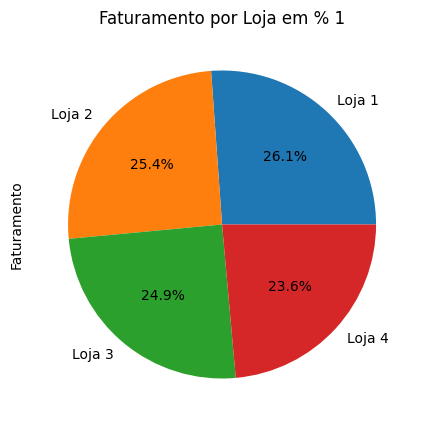

In [17]:
faturamento_lojas.plot(kind="pie", figsize=(5,5), title="Faturamento por Loja em % 1", autopct='%1.1f%%')

<Axes: title={'center': 'Vendas por Categoria 2'}, ylabel='Categoria do Produto'>

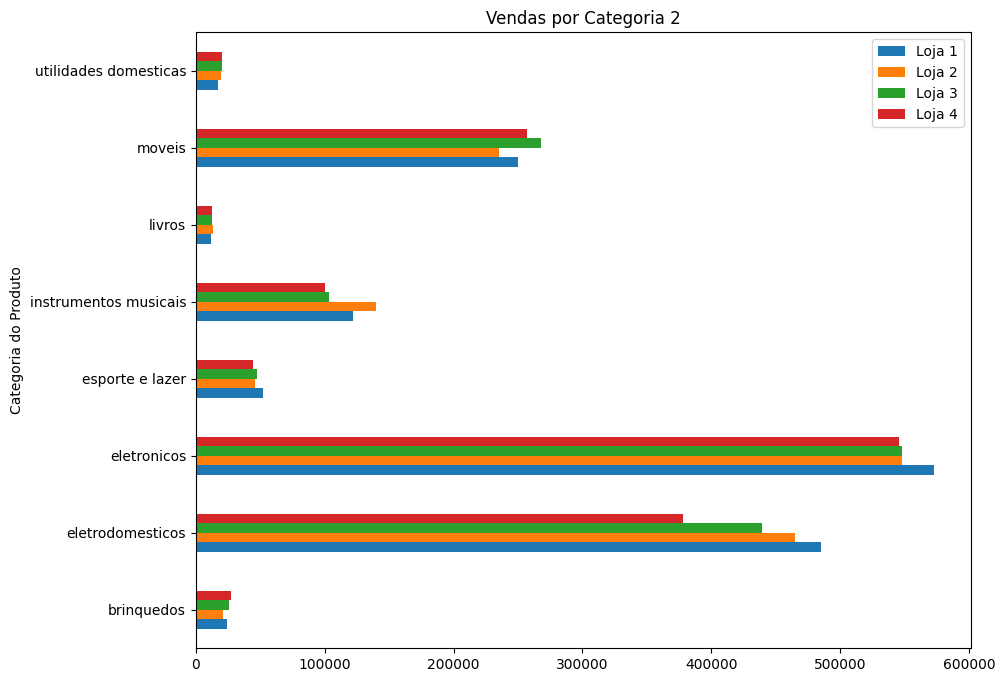

In [18]:
vendas_categorias_Loja.plot(kind="barh",figsize=(10,8), title="Vendas por Categoria 2")

<Axes: title={'center': 'Produtos Mais e Menos Vendidos 3'}>

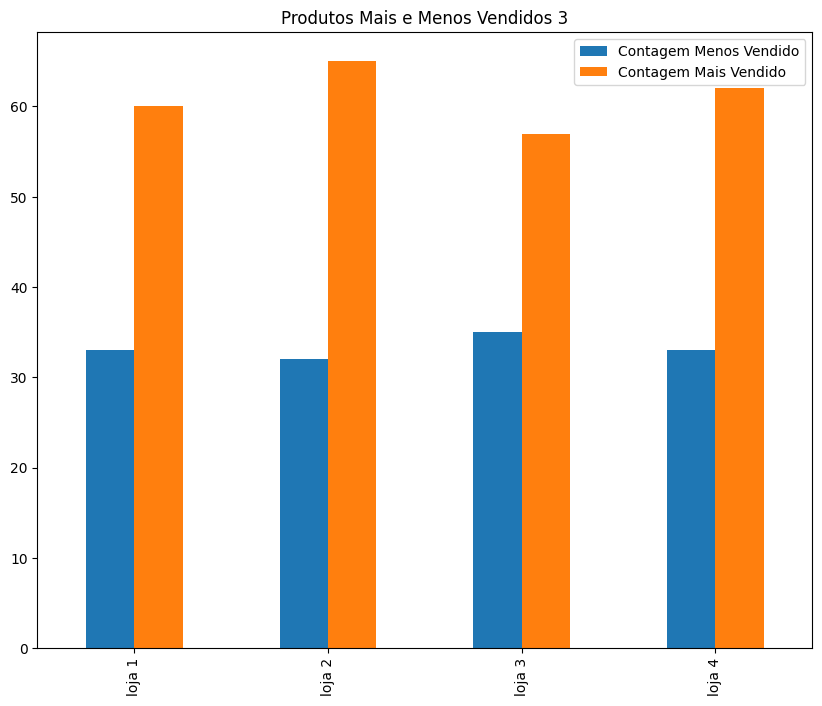

In [19]:
df_destaques.plot(kind="bar", figsize=(10,8), title="Produtos Mais e Menos Vendidos 3")

array([<Axes: title={'center': 'Frete Médio'}>], dtype=object)

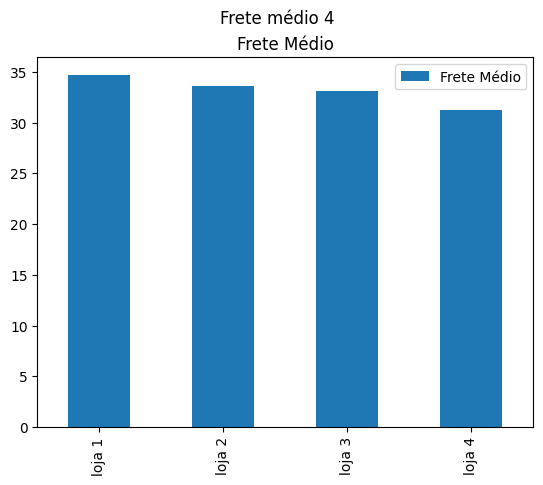

In [20]:
frete_medio.plot(kind="bar",subplots=True, title="4")

# Relatório Final

Durante o desafio de Data Science da Alura deve-se extrair, organizar e analisar dados brutos envolvendo as loja Alura Store, pertencentes ao Senhor João, com o intuito de auxilia-lo na decisão de vender uma de suas lojas com a finalidade que, o mesmo, consiga iniciar um novo empreendimento com o capital da venda. O desafiante deverá avaliar métricas de desempenho como, faturamento total das lojas, vendas por categorias de produtos, avaliação dos clientes e o frete médio de cada compra.

Ao fazer a análise dos dados, é perceptível que as variáveis de cada loja se mantem muito parecidas. Entretanto, é possível analisar que a Loja 4 apresenta défit em certos assuntos, como no gráfico 1 onde o seu faturamento total é o menor entre as quatros lojas, representando 23.6% do faturamento total das Alura Store e ao examinar o gráfico 2 é possível notar que, a loja 4, apenas possúi domínio em categorias de baixo mercado como no ramo da venda de brinquedos, sendo essa a terceira categoria com o menor número de vendas dentre as lojas, além do mais, a tendência deste mercado é diminuir continuamente, com cada vez mais crianças preferindo o uso de eletrônicos na hora das brincadeiras. Indo para o lado da satisfação do cliente, a loja 4, apresenta a segunda pior média de avaliação dos clientes conforme o gráfico 4, estando atrás apenas da loja 1. Embora a loja 1 tenha a pior análise, ela tem o maior faturamento e domínio do mercado de eletrônicos e eletrodomésticos, sendo que o atendimento e, consequentemente, a avaliação desta loja pode ser melhorado com programas de treinamento dos funcionários.

É conclusivo que, a Loja 4, apresenta os piores índicies tanto em vendas quanto em avaliações dos clientes isso somado ao fato de que a loja apresenta desempenho inferior as outras em mercados grandes como de eletrônicos, eletrodomésticos e móveis, apenas apresentando força em mercados pequenos como de brinquedos, livros e utilidades domésticas, sendo que, o mercado de lojas físicas de brinquedos e livros está em decadencia principamente pelo desisteresse nestas áreas e pelo domínio do mercado de livro por marketplaces como a Amazon.